In [2]:
import pandas as pd

data = pd.read_csv('cleaned_bank_transactions.csv')
data.describe()

,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,901358.000000,901358.000000,9.013580e+05,901358.000000,901358.000000,9.013580e+05
mean,1986.972672,0.723298,8.173280e+04,29.631584,15.464395,1.298540e+03
std,5.512324,0.447368,3.981005e+05,11.804388,5.162824,5.475934e+03
min,1973.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00
25%,1983.000000,0.000000,4.268000e+03,23.000000,12.000000,1.480000e+02
50%,1988.000000,1.000000,1.479800e+04,33.000000,16.000000,4.000000e+02
75%,1991.000000,1.000000,4.750900e+04,36.000000,20.000000,1.020000e+03
max,2020.000000,1.000000,4.316556e+07,49.000000,23.000000,1.560035e+06


# Mixture Models con librerías

In [9]:
# Importar las bibliotecas necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [10]:
# Cargar el conjunto de datos
df = pd.read_csv('cleaned_bank_transactions.csv')

# Seleccionar las columnas que se utilizarán en el modelo
X = df

# Estandarizar los datos
scaler = StandardScaler()
data = scaler.fit_transform(X)

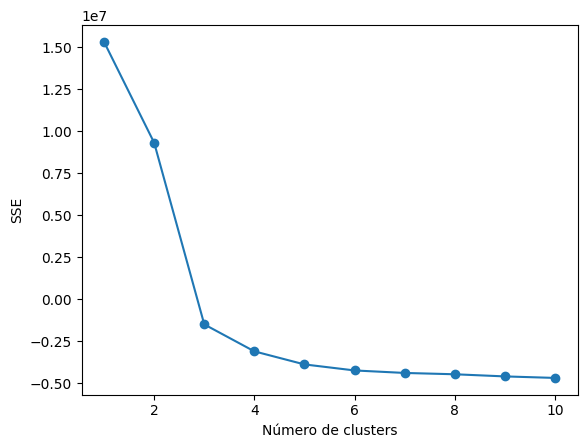

LinAlgError: Last 2 dimensions of the array must be square

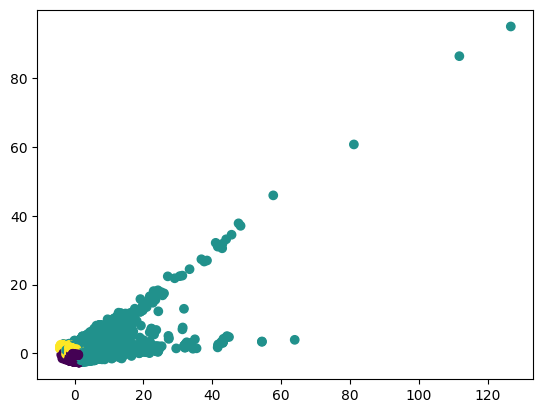

In [11]:
# Encontrar el numero de clusters ideal con el método del codo
sse = []
for i in range(1, 11):
    model = GaussianMixture(n_components=i, covariance_type='full', random_state=42)
    model.fit(data)
    sse.append(model.bic(data))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

# Ajustar el modelo de Mixture Models utilizando el número de clusters seleccionado
model = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
model.fit(data)

# Utilizar PCA para visualizar los datos en dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# Mostrar gráficamente cómo se dividen los clusters seleccionados y mostrar la covarianza como una elipse para cada uno de los clusters
labels = model.predict(data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
for i in range(model.n_components):
    mean = pca.transform(model.means_[i].reshape(1, -1))
    covar = np.cov(data.T)
    v, w = np.linalg.eigh(covar)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convertir a grados
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean[0], v[0], v[1], 180 + angle, color='black')
    ell.set_clip_box(plt.gca().bbox)
    ell.set_alpha(0.5)
    plt.gca().add_artist(ell)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Segmentación de Clientes utilizando Mixture Models')
plt.show()

# Evaluar el desempeño del modelo utilizando la métrica de Silhouette Score
silhouette_score(data, labels)